# Homework 6

## Part A

A fit with a function $f(x; \gamma)$ on a measured x-distribution yields the result for the parameter $\gamma$ :

$$
 \gamma = (-0.34 ± 0.48 ) \times 10^{-5}
$$

with $\gamma > 0$. Put an upper limit at $90\%$ C.L. on g using:

### Frequentist Approach

In the classical frequentist approach, the fit is shifted to the right so that only 10% of it remains below the initially given value of gamma. The new mean of the shifted Gaussian is then found, and this corresponds to the upper limit at $90\%$.

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2

In [172]:
# Parameters
mean = -0.34e-5
std_dev = 0.48e-5

# Calculate the new mean to shift the Gaussian so that 10% is below the original mean
desired_prob = 1 - 0.9
z_value = norm.ppf(desired_prob)  # z-score for the desired probability

new_mean = mean - z_value * std_dev

In [173]:
# Define the x range to be between -3e-5 and 3e-5
x = np.linspace(-3e-5, 3e-5, 1000)

# Recalculate the original and shifted Gaussian distributions with the new x range
y = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
y_shifted = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - new_mean) / std_dev)**2)


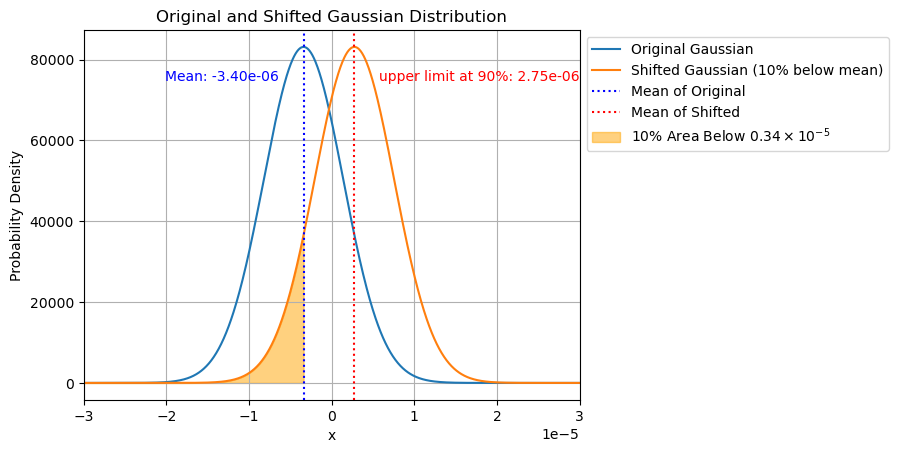

In [174]:
# Plot both distributions with additional features
plt.plot(x, y, label='Original Gaussian')
plt.plot(x, y_shifted, label='Shifted Gaussian (10% below mean)')

# Add vertical lines and annotations for the means
plt.axvline(mean, color='blue', linestyle=':', label='Mean of Original')
plt.axvline(new_mean, color='red', linestyle=':', label='Mean of Shifted')

# Annotate the means
plt.text(mean - 0.3e-5, max(y) * 0.9, f'Mean: {mean:.2e}', horizontalalignment='right', color='blue')
plt.text(new_mean + 0.3e-5, max(y_shifted) * 0.9, f'upper limit at 90%: {new_mean:.2e}', horizontalalignment='left', color='red')

# Shade the area under the second Gaussian curve that corresponds to the 10% below the first mean
x_shade = np.linspace(-3e-5, mean, 1000)
y_shade = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_shade - new_mean) / std_dev)**2)
plt.fill_between(x_shade, y_shade, alpha=0.5, color='orange', label=r'10% Area Below $0.34\times 10^{-5}$')

plt.title('Original and Shifted Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.xlim(-3e-5, 3e-5)  # Set the x-axis range

# Adjust the legend to avoid overlapping
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


The upper limit is $2.75\times 10^{6}$

### Bayesian Limit

For this case, we will only take the positive part of the Gaussian, then normalize it, and find the value for which 90% of all values are below this.

Which is basically solving this equation:

$$
    L(\gamma_{t}|\overline{\gamma}) = \frac{L(\overline{\gamma}|\gamma_{t}) \pi(\gamma_{t})}{\int_0^\infty{d \gamma_{t} L(\overline{\gamma}|\gamma_{t})}} = 0.90
$$

and taking

$$
\begin{align}
    \pi(\gamma) &=
    \begin{cases}
        0 & \text{if } \gamma < 0 \\
        1 & \text{if } \gamma > 0
    \end{cases}\\
\end{align}
$$


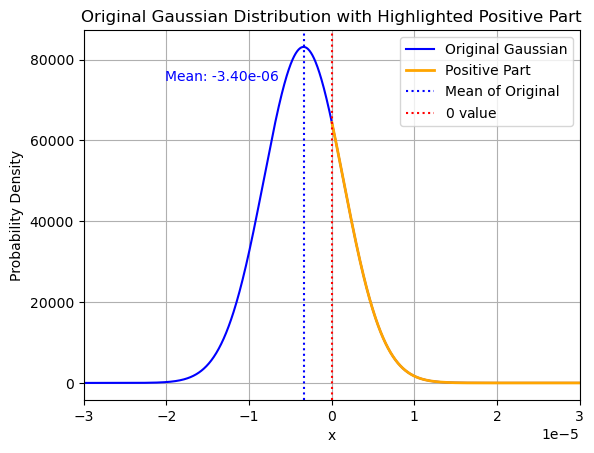

In [175]:
# Plot the original Gaussian distribution
plt.plot(x, y, label='Original Gaussian', color='blue')

# Highlight the positive part of the Gaussian
positive_x = x[x >= 0]
positive_y = y[x >= 0]
plt.plot(positive_x, positive_y, label='Positive Part', color='orange', linewidth=2)

# Add vertical line and annotation for the mean
plt.axvline(mean, color='blue', linestyle=':', label='Mean of Original')
plt.text(mean - 0.3e-5, max(y) * 0.9, f'Mean: {mean:.2e}', horizontalalignment='right', color='blue')
plt.axvline(0, color='red', linestyle=':', label=r'$0$ value')


plt.title('Original Gaussian Distribution with Highlighted Positive Part')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.xlim(-3e-5, 3e-5)  # Set the x-axis range

plt.show()


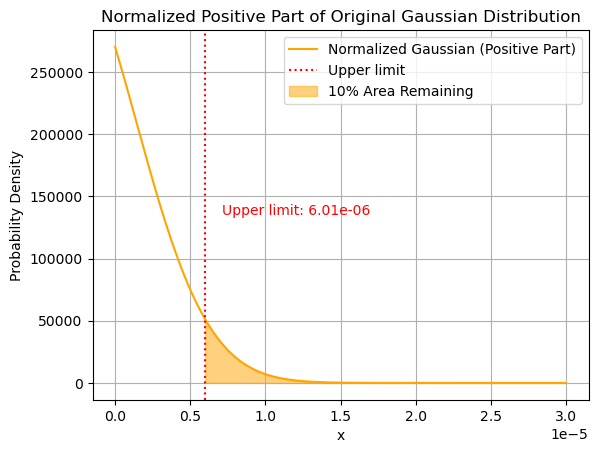

In [176]:
# Redefine the x range to be between 0 and 3e-5 to only plot the positive part
x_positive = np.linspace(0, 3e-5, 1000)

# Recalculate the original Gaussian distribution with the new x range
y_positive = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_positive - mean) / std_dev)**2)


# Calculate the area under the positive part of the Gaussian to normalize it
area_positive = np.trapz(y_positive, x_positive)

# Normalize the positive part of the Gaussian distribution
y_positive_normalized = y_positive / area_positive

# Calculate the cumulative distribution function (CDF) for the normalized Gaussian
cdf_positive = np.cumsum(y_positive_normalized) * (x_positive[1] - x_positive[0])

# Find the x value where the CDF is 90% (since we want 10% from right to left)
x_90_percent = x_positive[np.where(cdf_positive >= 0.90)[0][0]]

# Plot the normalized positive part of the Gaussian distribution
plt.plot(x_positive, y_positive_normalized, label='Normalized Gaussian (Positive Part)', color='orange')

# Add vertical line and annotation for the mean
plt.axvline(x_90_percent, color='red', linestyle=':', label='Upper limit')
plt.text(x_90_percent + 1.1e-5, max(y_positive_normalized) * 0.5, f'Upper limit: {x_90_percent:.2e}', horizontalalignment='right', color='red')

# Shade the area corresponding to 10% from right to left
x_shade = np.linspace(x_90_percent, 3e-5, 1000)
y_shade = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_shade - mean) / std_dev)**2) / area_positive
plt.fill_between(x_shade, y_shade, alpha=0.5, color='orange', label='10% Area Remaining')

plt.title('Normalized Positive Part of Original Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


The upper limit using the Bayesian method is $0.601 \times 10^{-5}$

### The unified Approach
The measured value and its uncertainty for $\gamma$ are given as $\gamma = (-0.34 \pm 0.48) \times 10^{-5}$. This value is normalized by its standard deviation (sigma), which will correspond to a normalized mean $x_0$.

To normalize the mean $\mu$ of $\gamma$ relative to its standard deviation $\sigma$, we use the formula:

$$
    x_0 = \frac{\mu}{\sigma} = \frac{-0.34}{0.48} \approx -0.708
$$

We find the row in Table X corresponding to $x_0 = -0.7$ and look under the column for the $90\%$ C.L. This will provide the upper limit normalized by sigma.

<p align="center">
  <img src="tableX.png" />
</p>


The upper limit $\widetilde{\gamma}$ on $\gamma$ normalized by sigma is roughly $1.02$.

We convert the normalized upper limit back to the actual scale using

$$
    \begin{align}
        \gamma_U &= \widetilde{\gamma} \times \sigma \\
        &= 1.02 \times 0.48 \times 10^{-5} \approx 4.896 \times 10^{-6} 
    \end{align}
$$

Thus, the upper limit on $\gamma$ at $90\%$ C.L., using the Feldman-Cousins approach with the Gaussian constrained to be non-negative, is $\gamma_U \approx 4.896 \times 10^{-6}$.


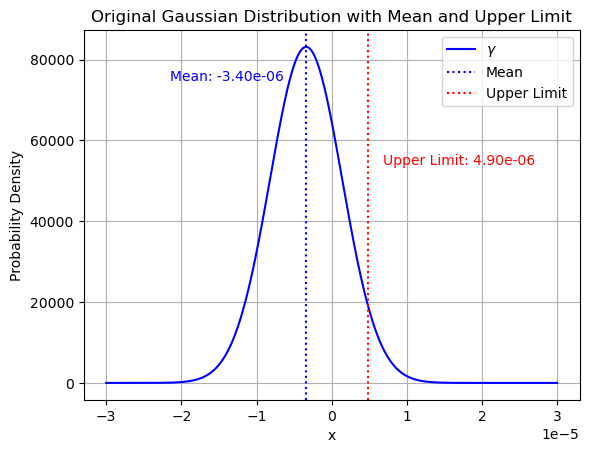

In [177]:
# Plot the original Gaussian distribution
plt.plot(x, y, label=r'$\gamma$', color="blue")

# Add vertical line and annotation for the mean
plt.axvline(mean, color='blue', linestyle=':', label='Mean')
plt.text(mean - 0.3e-5, max(y) * 0.9, f'Mean: {mean:.2e}', horizontalalignment='right', color='blue')

# Add vertical line and annotation for the upper limit
upper_limit = 4.896e-6
plt.axvline(upper_limit, color='red', linestyle=':', label='Upper Limit')
plt.text(upper_limit + 0.2e-5, max(y) * 0.65, f'Upper Limit: {upper_limit:.2e}', horizontalalignment='left', color='red')

plt.title('Original Gaussian Distribution with Mean and Upper Limit')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


## Part B

a counting experiment yields N=S+B=2 event in the signal region with B=5 expected background. Assuming negligible uncertainty on B, evaluate an upper limit for S at 95% C.L. using:

### The classical frequentist approach and Bayesian Approach

For this discrete case, we will refer to Figure 9.9 from Cowan, G. (1998). Statistical Data Analysis. Oxford University Press. Page 41. We will locate the expected background value on the x-axis and find its corresponding value on the y-axis for the curve representing two, which indicates the number of events in the experiment.

<p align="center">
  <img src="95Confidence.png" width="700"/>
</p>

It is found that the upper limit in the case of the classical frequentist approach is approximately $1.2$ and $4$ in the case of the Bayesian approach.

### The Unified Frequentis Approach

In this case, due to the difficulty of the calculations, the upper limit was found using Table VI for $n_0=2$ and expected background $5$

<p align="center">
  <img src="tableVI.png" width="700"/>
</p>

The upper limit found was $2.49$.

## Part C

The parameter $\mu=\sigma/\sigma_{THEORY}$ for the signal strength of a new particle (with predicted cross section $\sigma_{THEORY}$) is measured with three different and independent methods yielding:

$$
    \begin{align}
        \mu_1 &= 0.55 \pm 0.30 \\
        \mu_2 &= 0.43 \pm 0.37 \\ 
        \mu_3 &= 0.99 \pm 0.29
    \end{align}
$$

Assuming gaussian pdfs and errors:

### Best estimate of the parameter $\mu$ and its uncertainty;

The weighted mean $\mu$ is given by:

$$
    \widehat{\mu} = \mu_{weighted} = \frac{\sum_i{\frac{\mu_i}{\sigma_i^2}}}{\sum_i{\frac{1}{\sigma_i^2}}}
$$

The data is $\mu_1=0.55$, $\sigma_1=0.30$; $\mu_2=0.43$, $\sigma_2=0.37$; $\mu_3=0.99$, $\sigma_3=0.29$

The uncertainty in the weighted mean is given by:

$$
    \widehat{\sigma} = \sigma_{weighted} = \sqrt{\frac{1}{\sum_i{\frac{1}{\sigma_i^2}}}}
$$

In [178]:
# Given values for mu and their uncertainties
mus = np.array([0.55, 0.43, 0.99])
sigmas = np.array([0.30, 0.37, 0.29])

# Calculating weighted average of mu
mu_hat_numerator = sum(mu / sigma**2 for mu, sigma in zip(mus, sigmas))
mu_hat_denominator = sum(1 / sigma**2 for sigma in sigmas)
mu_hat = mu_hat_numerator / mu_hat_denominator

# Calculating uncertainty in the weighted mean
sigma_hat = (1 / sum(1 / sigma**2 for sigma in sigmas))**0.5

mu_hat, sigma_hat


(0.6937097832743002, 0.1816491633014652)

The best estimate is $\widehat{\mu} = \mu_{weighted} = 0.69 \pm 0.18$

### P-value

To evaluate the p-value for the hypothesis that the three measurements of the parameter $\mu$ are consistent with having the same true value, we can perform a chi-squared ($\chi^2$) test. This test will help determine how likely it is that the differences between the measured values and their weighted mean (which we would calculate if it weren't for technical issues) are due to random fluctuations alone.

The chi-squared statistic is given by:

$$
    \chi^2 = \sum \frac{(\mu_i - \widehat{\mu})^2}{\sigma_i^2}
$$

where,

- $\mu_i$ are the individual measurements.
- $\mu_{wwighted}$ is the weighted average of the measurements.
- $\sigma_i$ are the uncertainties of each measurement.

The degrees of freedom for this test are $N - 1$ where $N$ is the number of measurements. Since we have three measurements, the degrees of freedom will be $2$.

Using the chi-squared distribution and the calculated χ2 statistic, determine the p-value, which is the probability of observing a χ2 value at least as extreme as the one calculated, under the null hypothesis $H_0$ that all measurements come from the same true value.

If we assume that the weighted mean ($\mu_{weighted}$) and its uncertainty ($\sigma_{weighted}$) were correctly calculated earlier, we could use these values to compute the $\chi^2$


In [179]:
# Calculate chi-squared statistic
chi_squared = np.sum(((mus - mu_hat)**2 / sigmas**2))

# Degrees of freedom: number of measurements minus 1
degrees_of_freedom = len(mus) - 1

# Calculate the p-value
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

print("Chi-squared statistic:", chi_squared)
print("P-value:", p_value)

Chi-squared statistic: 1.7813063535699605
P-value: 0.4103876095300264


Then

$$
    \begin{align}
        \chi^2 &= 1.78\\
        p &= 0.41
    \end{align}
$$

When performing a statistical test, such as the chi-squared test, a test statistic (in this case, $\chi^2$) is calculated, and the probability (p-value) of obtaining a test statistic at least as extreme as the one observed is determined, assuming the null hypothesis is true. If the p-value is very small, there may be sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis.

To determine if the hypothesis (that all measurements are consistent with having the same true value of $\mu$) is valid based on the p-value, we chose the confidence level of $95\%$, this is $\alpha = 0.05$.

As the p-value ($p = 0.41$) is grater tha $\alpha$ we do not reject the null hypothesis, indicating that the data do not provide strong evidence against the hypothesis that all measurements are from the same true value.

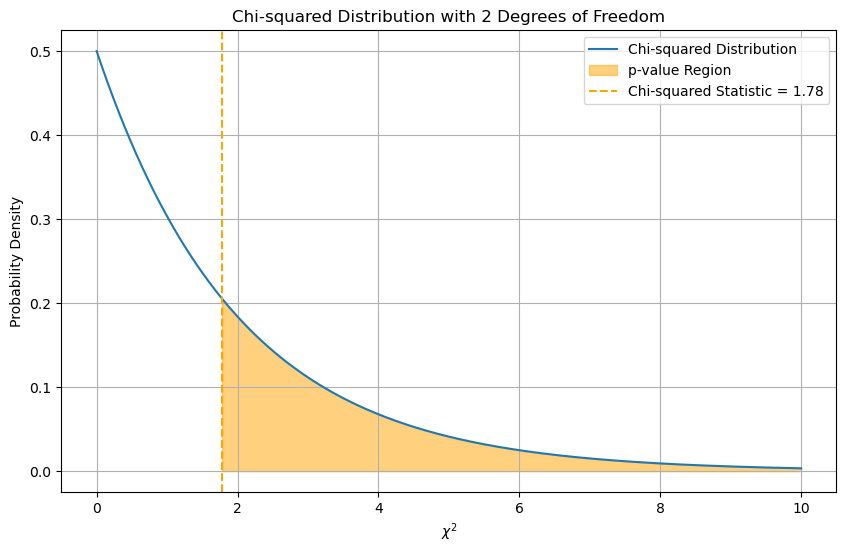

In [180]:
# Define the range of x (chi-squared values)
x = np.linspace(0, 10, 1000)
# Compute the chi-squared PDF for the degrees of freedom
y = chi2.pdf(x, degrees_of_freedom)

# Plot the chi-squared distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Chi-squared Distribution')

# Fill the area for the p-value
plt.fill_between(x, 0, y, where=(x > chi_squared), color='orange', alpha=0.5, label='p-value Region')

# Highlight the chi-squared statistic
plt.axvline(chi_squared, color='orange', linestyle='dashed', label=f'Chi-squared Statistic = {chi_squared:.3}')

plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability Density')
plt.title(f'Chi-squared Distribution with {degrees_of_freedom} Degrees of Freedom')
plt.legend()
plt.grid(True)
plt.show()

The figure is the $\chi^2$ distribution for $2$ degrees of freedom. The case of $\chi^2 = 1.78$ is illustrated. The orange shaded area correspond to the $p$ value.

### Expression of Test Statistics

To construct the test statistic $q_{\mu}$ for evaluating the consistency of measurements of a parameter $\mu$ (signal strength relative to a theoretical prediction $\sigma_{THEORY}$), we can use the likelihood ratio test statistic. This statistic compares the likelihood of the data under the null hypothesis (that the measurements are described by a specific value of $\mu$) against the maximum likelihood estimate of $\mu$ from the data.

1. **Likelihood Function:**

The likelihood $L(\mu)$ for the measurements given a specific $\mu$ value, assuming Gaussian uncertainties, is given by the product of individual Gaussian distributions for each measurement:

$$
    L(\mu) = \prod_{i=1}^{3} \frac{1}{\sqrt{2 \pi \sigma^2_i}} exp{\left(-\frac{(\mu_i - \mu)^2}{2\sigma^2_i}\right)}
$$

where $\mu_i$​ are the measured values, and $\sigma_i$ are the uncertainties of each measurement.

2. **Maximum Likelihood Estimate ($\widehat{\mu}$):**

This is typically calculated as the weighted mean when assuming Gaussian distributions: 

$$
    \mu_{weighted} = \widehat{\mu} = \frac{\sum(\mu_i/\sigma_i^2)}{\sum(1/\sigma_i^2)}
$$

3. **Test Statistic $u_\mu$:**

For a given $\mu$, the test statistic $q_\mu$ is defined as:

$$
    q_\mu = -2 \ln{\frac{L(\underline{x},\mu)}{L(\underline{x},\widehat{\mu})}}
$$

Given the individual Gaussian distributions, we can rewrite $q_\mu$ as:

$$
    q_\mu = \left[\sum_{i=1}^3 \frac{(\mu_i - \mu)^2}{\sigma_i^2} - \sum_{i=1}^3 \frac{(\mu_i - \widehat{\mu})^2}{\sigma_i^2} \right]
$$

This expression quantifies how much less likely the data are under any hypothetical $\mu$ compared to the optimal $\widehat{\mu}$.

### Toy MC Simulation

To perform the Toy Monte Carlo (MC) simulations for the given measurements, we'll set up a simulation that estimates the probability density functions (pdfs) for the test statistics $q_1$ under the null hypothesis $\mu = 0$ and the alternative hypothesis $\mu = 1$, as well as $q_0$ under $\mu = 0$.

The steps are:

1. Simulate Measurement Sets: For each hypothesis ($\mu = 0$ and $\mu =1$), generate synthetic measurements based on the given uncertainties.

2. Calculate Test Statistics: For each synthetic dataset, calculate $q_0$ and $q_1$.

3. Build PDFs: Aggregate the results to approximate the distributions of $q_0$ and $q_1$ under each hypothesis.

change sigmas for a column vector: [[0.3 ]
 [0.37]
 [0.29]]


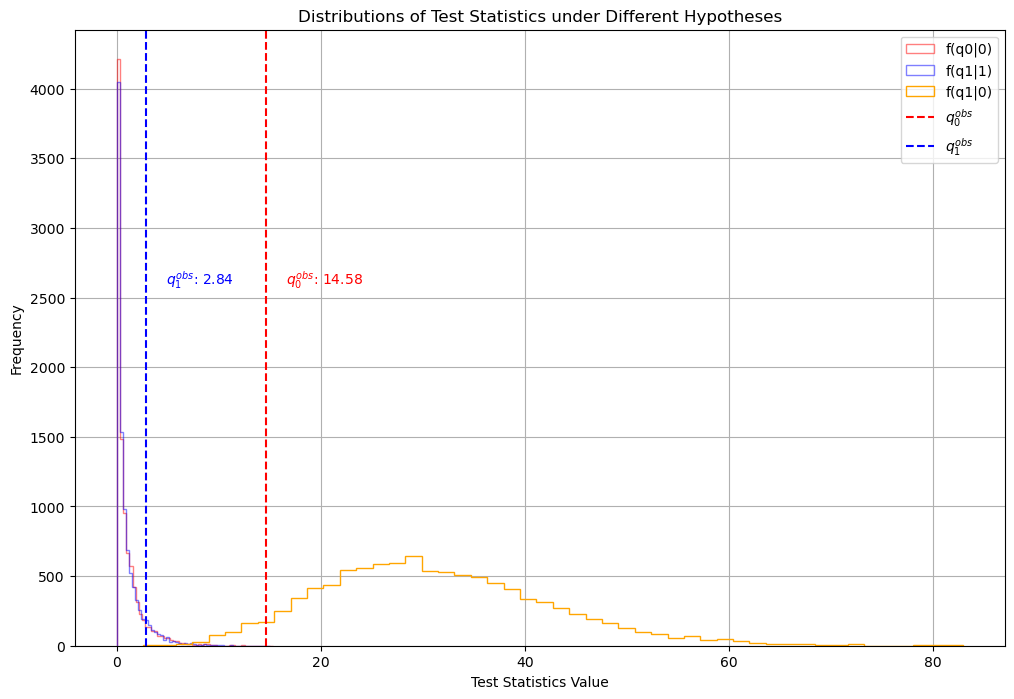

In [181]:
# Calculate weights for the weighted mean
weights = 1 / sigmas**2

# Number of trials for the MC simulation
N = 10000

print("change sigmas for a column vector:", sigmas[:, np.newaxis])

# Function to simulate datasets
def simulate_datasets(mu_true, N):
    # Generates synthetic data for each measurement assuming Gaussian errors
    # mu_true: assumed true value of mu under the hypothesis
    # N: number of Monte Carlo trials
    return np.random.normal(mu_true, sigmas[:, np.newaxis], (len(mus), N))

# Function to calculate the test statistic q_mu
def calculate_q_mu(simulated_data, mu_hypothesis):
    # Calculates the test statistic for a set of simulated data
    # mu_hypothesis: the hypothesis value of mu being tested
    mu_hat = np.sum(weights[:, np.newaxis] * simulated_data, axis=0) / np.sum(weights)
    q_mu = np.sum((simulated_data - mu_hypothesis)**2 / sigmas[:, np.newaxis]**2, axis=0) - \
           np.sum((simulated_data - mu_hat)**2 / sigmas[:, np.newaxis]**2, axis=0)
    return q_mu

# Simulate datasets for mu = 1 and mu = 0
data_mu_1 = simulate_datasets(1, N)
data_mu_0 = simulate_datasets(0, N)

# Calculate q1 and q0
q1_mu_1 = calculate_q_mu(data_mu_1, 1)  # q1 under mu = 1
q1_mu_0 = calculate_q_mu(data_mu_0, 1)  # q1 under mu = 0
q0_mu_0 = calculate_q_mu(data_mu_0, 0)  # q0 under mu = 0

# Plotting the results
plt.figure(figsize=(12, 8))
plt.hist(q0_mu_0, bins=50, histtype='step', alpha=0.5, label='f(q0|0)', color='red')
plt.hist(q1_mu_1, bins=50, histtype='step', alpha=0.5, label='f(q1|1)', color='blue')
plt.hist(q1_mu_0, bins=50, histtype='step', label='f(q1|0)', color='orange')

# Adding vertical lines for observed statistics
plt.axvline(x=14.58, color='red', linestyle='--', label='$q_0^{obs}$')
plt.text(14.58 + 2, 4000 * 0.65, r'$q_0^{obs}$: 14.58', horizontalalignment='left', color='red')
plt.axvline(x=2.84, color='blue', linestyle='--', label='$q_1^{obs}$')
plt.text(2.84 + 2, 4000 * 0.65, r'$q_1^{obs}$: 2.84', horizontalalignment='left', color='blue')


plt.legend()
plt.xlabel('Test Statistics Value')
plt.ylabel('Frequency')
plt.title('Distributions of Test Statistics under Different Hypotheses')
plt.grid(True)
plt.show()


calculate $q_0^{obs}$ is to calculate

$$
    q^{obs}_0 = \sum \left(\frac{(\mu_i - 0)^2}{\sigma_i^2}\right) - \sum \left(\frac{(\mu_i - \widehat{\mu})^2}{\sigma_i^2}\right)
$$

In statistical testing, particularly when working with the distribution of a test statistic from simulations like in Monte Carlo methods, the p-value is indeed the area under the probability density function (pdf) from the observed test statistic ($q_0^{obs}$) to infinity. This area represents the probability of obtaining a result at least as extreme as $q_0^{obs}$ under the null hypothesis.

$$
    p_0 = \int_{q_0^{obs}}^{\infty} f(q_0|0) dq_0
$$

In [206]:
# Function to calculate the observed q0 for the given data
def calculate_observed_q0(mus, sigmas, mu_hypothesis):
    mu_hat = np.sum(weights * mus) / np.sum(weights)
    q0_obs = np.sum((mus - mu_hypothesis)**2 / sigmas**2) - \
             np.sum((mus - mu_hat)**2 / sigmas**2)
    return q0_obs

# Calculate the observed q0 for mu = 0
q0_obs = calculate_observed_q0(mus, sigmas, 0)

# Calculate the p-value
p_value_q0 = np.mean(q0_mu_0 >= q0_obs)

q0_obs, p_value_q0

(51.325084976723346, 0.0)

Line 12: This directly computes the proportion of simulated $q_0$ values that are greater than or equal to the observed $q_0^{obs}$. This method is equivalent to integrating the tail of the distribution from $q_0^{obs}$ to infinity when the distribution of $q_0$ under the null hypothesis ($\mu = 0$) is approximated by the histogram of the Monte Carlo results.

$$
    \begin{align}
        q_0^{obs} &= 14.58\\
        p_0 &= 0.0002
    \end{align}
$$

This very low p-value suggests that the null hypothesis ($\mu = 0$) **background-only hypotesis** is highly unlikely given the observed data, indicating a strong inconsistency between the measurements and the hypothesis that $\mu$ equals zero.

### $CL_{s+b}$, $CL_b$ and $CL_s$

1. $CL_{s+b}$ is the p-value under the signal plus background hypothesis ($\mu=1$).

2. $CL_b$  is the p-value under the background-only hypothesis ($\mu=0$).

3. $CL_s$ is calculated using the formula $$\frac{CL_{s+b}}{CL_b}$$ which modifies the $CL_{s+b}$ p-value to account for the possibility of excluding a true hypothesis when the expected background fluctuation is high.

#### First Step: Calculate $q_1^{obs}$
Let's calculate the observed $q_1^{obs}$ using the actual data:

$$
    \begin{align}
        q_1^{obs} &= -2 \ln{\frac{L(\underline{x},\mu)}{L(\underline{x},\widehat{\mu})}}\\
        &= \sum \left(\frac{(\mu_i - 1)^2}{\sigma_i^2}\right) - \sum \left(\frac{(\mu_i - \widehat{\mu})^2}{\sigma_i^2}\right)
    \end{align}
$$


In [183]:
def calculate_observed_q1(mus, sigmas, mu_hypothesis):
    mu_hat = np.sum(weights * mus) / np.sum(weights)
    q1_obs = np.sum((mus - mu_hypothesis)**2 / sigmas**2) - \
             np.sum((mus - mu_hat)**2 / sigmas**2)
    return q1_obs

q1_obs = calculate_observed_q1(mus, sigmas, 1)

#### Second Step: Calculate $CL_{s+b}$ and $CL_b$

Compute  and $CL_b$

* $CL_{s+b}$ is the proportion of simulated  $q_1$ values under $\mu=1$ that are greater than $q_1^{obs}$.

* $CL_{b}$ is the proportion of simulated  $q_1$ values under $\mu=0$ that are greater than $q_1^{obs}$.

#### Third Step: Calculate $CL_{s}$

We use $$\frac{CL_{s+b}}{CL_b}$$. If $CL_{s} < \alpha = 0.05$ for $95\%$ C.L.  the signal hypothesis ($\mu=1$) is considered excluded at $95\%$ confidence level.

In [184]:
# Calculate CLs+b, CLb, and CLs
CL_s_plus_b = np.mean(q1_mu_1 >= q1_obs)
CL_b = np.mean(q1_mu_0 >= q1_obs)
CL_s = CL_s_plus_b / CL_b if CL_b > 0 else 0  # Prevent division by zero

q1_obs, CL_s_plus_b, CL_b, CL_s

(2.8431478641210726, 0.0936, 0.9999, 0.09360936093609361)

Then

$$
    \begin{align}
        q_1^{obs} &= 2.84\\
        CL_{s+b} &= 0.09\\
        CL_{b} &= 1.00\\
        CL_{s} &= 0.09
    \end{align}
$$

The lower is $q_1^{obs}$, the more compatible the data are with the theory, and the less compatible the data are with the pure background expectations.

* **Sensivity  $CL_{s+b} = 0.09$:** suggests there is an $9\%$ probability of observing a $q_1$ at least as extreme as $q_1^{obs}$ under the signal-plus-background hypothesis. This is the median $CL$ with which we exclude the signal in case of background-only experiment. Clearly, the smaller is the $CL_{s+b}$ obtained, the higher is the capability of the experiment to exclude the signal. 
This is also the confidence level. so we exclude the signal at $91\%$ confidence level.

* **$CL_{b} = 1.00$** indicates that every simulated $q_1$ value under $\mu = 0$ is less than the observed $q_1^{obs}$, suggesting that the background-only hypothesis does not explain the observed data well.

* **Signa exclusion $CL_{s} = 0.09$:** Reflects the same probability as $CL_{s+b}$ in this case because $CL_{b}$ is $1.0$. Typically, $CL_{s}$ is used to adjust the significance of the signal hypothesis by considering how frequently the background can mimic signal-like effects. Here, since $CL_{b}$ is at its maximum, matches $CL_{s+b}$.
Here, we can see that the signal is not excluded.


## Part D

Repeat all the evaluations of point C for the following set of measurements

$$
    \begin{align}
        \mu_1 &= 1.55 \pm 0.30 \\
        \mu_2 &= 1.43 \pm 0.37 \\ 
        \mu_3 &= 0.99 \pm 0.29
    \end{align}
$$

### Best estimate of the parameter $\mu$ and its uncertainty;

The weighted mean $\mu$ is given by:

$$
    \mu_{weighted} = \frac{\sum_i{\frac{\mu_i}{\sigma_i^2}}}{\sum_i{\frac{1}{\sigma_i^2}}}
$$

The data is $\mu_1=1.55$, $\sigma_1=0.30$; $\mu_2=1.43$, $\sigma_2=0.37$; $\mu_3=0.99$, $\sigma_3=0.29$

The uncertainty in the weighted mean is given by:

$$
    \sigma_{weighted} = \sqrt{\frac{1}{\sum_i{\frac{1}{\sigma_i^2}}}}
$$

In [185]:
# Given values for mu and their uncertainties
mus = np.array([1.55, 1.43, 0.99])
sigmas = np.array([0.30, 0.37, 0.29])

# Calculating weighted average of mu
mu_hat_numerator = sum(mu / sigma**2 for mu, sigma in zip(mus, sigmas))
mu_hat_denominator = sum(1 / sigma**2 for sigma in sigmas)
mu_hat = mu_hat_numerator / mu_hat_denominator

# Calculating uncertainty in the weighted mean
sigma_hat = (1 / sum(1 / sigma**2 for sigma in sigmas))**0.5

mu_hat, sigma_hat


(1.3013623572561985, 0.1816491633014652)

The best estimate is $\widehat{\mu} = 1.30 \pm 0.18$

### P-value

To evaluate the p-value for the hypothesis that the three measurements of the parameter $\mu$ are consistent with having the same true value, we can perform a chi-squared ($\chi^2$) test. This test will help determine how likely it is that the differences between the measured values and their weighted mean (which we would calculate if it weren't for technical issues) are due to random fluctuations alone.

The chi-squared statistic is given by:

$$
    \chi^2 = \sum \frac{(\mu_i - \mu_{weighted})^2}{\sigma_i^2}
$$

where,

- $\mu_i$ are the individual measurements.
- $\mu_{wwighted}$ is the weighted average of the measurements.
- $\sigma_i$ are the uncertainties of each measurement.

The degrees of freedom for this test are $N - 1$ where $N$ is the number of measurements. Since we have three measurements, the degrees of freedom will be $2$.

Using the chi-squared distribution and the calculated χ2 statistic, determine the p-value, which is the probability of observing a χ2 value at least as extreme as the one calculated, under the null hypothesis $H_0$ that all measurements come from the same true value.

If we assume that the weighted mean ($\mu_{weighted}$) and its uncertainty ($\sigma_{weighted}$) were correctly calculated earlier, we could use these values to compute the $\chi^2$


In [186]:
# Calculate chi-squared statistic
chi_squared = np.sum(((mus - mu_hat)**2 / sigmas**2))

# Degrees of freedom: number of measurements minus 1
degrees_of_freedom = len(mus) - 1

# Calculate the p-value
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

print("Chi-squared statistic:", chi_squared)
print("P-value:", p_value)

Chi-squared statistic: 1.960523244539028
P-value: 0.3752129219531357


Then

$$
    \begin{align}
        \chi^2 &= 1.96\\
        p &= 0.38
    \end{align}
$$

When performing a statistical test, such as the chi-squared test, a test statistic (in this case, $\chi^2$) is calculated, and the probability (p-value) of obtaining a test statistic at least as extreme as the one observed is determined, assuming the null hypothesis is true. If the p-value is very small, there may be sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis.

To determine if the hypothesis (that all measurements are consistent with having the same true value of $\mu$) is valid based on the p-value, we chose the confidence level of $95\%$, this is $\alpha = 0.05$.

As the p-value ($p = 0.38$) is grater tha $\alpha$ we do not reject the null hypothesis, indicating that the data do not provide strong evidence against the hypothesis that all measurements are from the same true value.

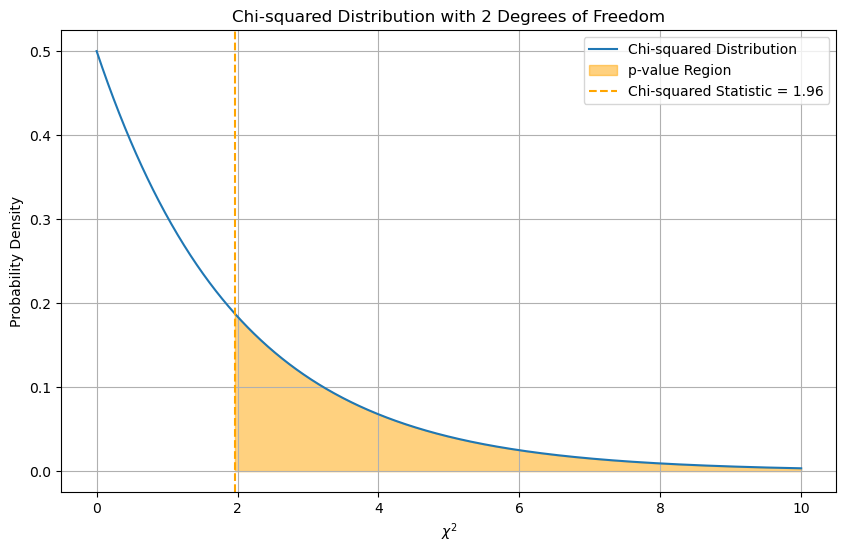

In [187]:
# Define the range of x (chi-squared values)
x = np.linspace(0, 10, 1000)
# Compute the chi-squared PDF for the degrees of freedom
y = chi2.pdf(x, degrees_of_freedom)

# Plot the chi-squared distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Chi-squared Distribution')

# Fill the area for the p-value
plt.fill_between(x, 0, y, where=(x > chi_squared), color='orange', alpha=0.5, label='p-value Region')

# Highlight the chi-squared statistic
plt.axvline(chi_squared, color='orange', linestyle='dashed', label=f'Chi-squared Statistic = {chi_squared:.3}')

plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability Density')
plt.title(f'Chi-squared Distribution with {degrees_of_freedom} Degrees of Freedom')
plt.legend()
plt.grid(True)
plt.show()

The figure is the $\chi^2$ distribution for $2$ degrees of freedom. The case of $\chi^2 = 1.96$ is illustrated. The orange shaded area correspond to the $p$ value.

### Expression of Test Statistics

To construct the test statistic $q_{\mu}$ for evaluating the consistency of measurements of a parameter $\mu$ (signal strength relative to a theoretical prediction $\sigma_{THEORY}$), we can use the likelihood ratio test statistic. This statistic compares the likelihood of the data under the null hypothesis (that the measurements are described by a specific value of $\mu$) against the maximum likelihood estimate of $\mu$ from the data.

1. **Likelihood Function:**

The likelihood $L(\mu)$ for the measurements given a specific $\mu$ value, assuming Gaussian uncertainties, is given by the product of individual Gaussian distributions for each measurement:

$$
    L(\mu) = \prod_{i=1}^{3} \frac{1}{\sqrt{2 \pi \sigma^2_i}} exp{\left(-\frac{(\mu_i - \mu)^2}{2\sigma^2_i}\right)}
$$

where $\mu_i$​ are the measured values, and $\sigma_i$ are the uncertainties of each measurement.

2. **Maximum Likelihood Estimate ($\widehat{\mu}$):**

This is typically calculated as the weighted mean when assuming Gaussian distributions: 

$$
    \mu_{weighted} = \widehat{\mu} = \frac{\sum(\mu_i/\sigma_i^2)}{\sum(1/\sigma_i^2)}
$$

3. **Test Statistic $u_\mu$:**

For a given $\mu$, the test statistic $q_\mu$ is defined as:

$$
    q_\mu = -2 \ln{\frac{L(\underline{x},\mu)}{L(\underline{x},\widehat{\mu})}}
$$

Given the individual Gaussian distributions, we can rewrite $q_\mu$ as:

$$
    q_\mu = \left[\sum_{i=1}^3 \frac{(\mu_i - \mu)^2}{\sigma_i^2} - \sum_{i=1}^3 \frac{(\mu_i - \widehat{\mu})^2}{\sigma_i^2} \right]
$$

This expression quantifies how much less likely the data are under any hypothetical $\mu$ compared to the optimal $\widehat{\mu}$.

### Toy MC Simulation

To perform the Toy Monte Carlo (MC) simulations for the given measurements, we'll set up a simulation that estimates the probability density functions (pdfs) for the test statistics $q_1$ under the null hypothesis $\mu = 0$ and the alternative hypothesis $\mu = 1$, as well as $q_0$ under $\mu = 0$.

The steps are:

1. Simulate Measurement Sets: For each hypothesis ($\mu = 0$ and $\mu =1$), generate synthetic measurements based on the given uncertainties.

2. Calculate Test Statistics: For each synthetic dataset, calculate $q_0$ and $q_1$.

3. Build PDFs: Aggregate the results to approximate the distributions of $q_0$ and $q_1$ under each hypothesis.

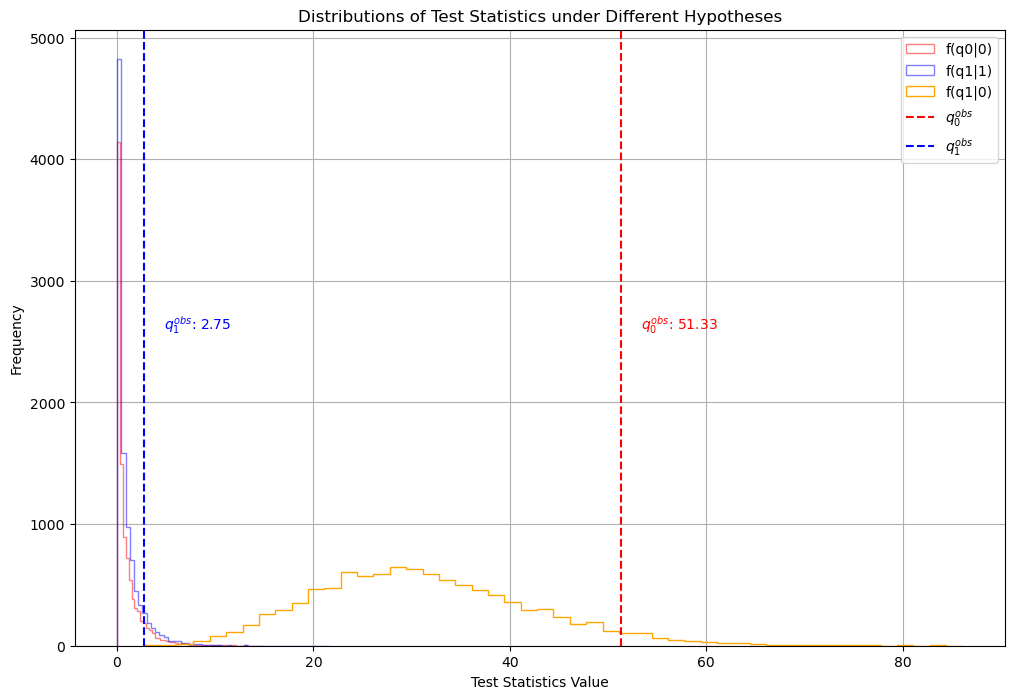

In [204]:
# Calculate weights for the weighted mean
weights = 1 / sigmas**2

# Number of trials for the MC simulation
N = 10000

# Simulate datasets for mu = 1 and mu = 0
data_mu_1 = simulate_datasets(1, N)
data_mu_0 = simulate_datasets(0, N)

# Calculate q1 and q0
q1_mu_1 = calculate_q_mu(data_mu_1, 1)  # q1 under mu = 1
q1_mu_0 = calculate_q_mu(data_mu_0, 1)  # q1 under mu = 0
q0_mu_0 = calculate_q_mu(data_mu_0, 0)  # q0 under mu = 0

# Plotting the results
plt.figure(figsize=(12, 8))
plt.hist(q0_mu_0, bins=50, histtype='step', alpha=0.5, label='f(q0|0)', color='red')
plt.hist(q1_mu_1, bins=50, histtype='step', alpha=0.5, label='f(q1|1)', color='blue')
plt.hist(q1_mu_0, bins=50, histtype='step', label='f(q1|0)', color='orange')

# Adding vertical lines for observed statistics
plt.axvline(x=51.33, color='red', linestyle='--', label='$q_0^{obs}$')
plt.text(51.33 + 2, 4000 * 0.65, r'$q_0^{obs}$: 51.33', horizontalalignment='left', color='red')
plt.axvline(x=2.75, color='blue', linestyle='--', label='$q_1^{obs}$')
plt.text(2.75 + 2, 4000 * 0.65, r'$q_1^{obs}$: 2.75', horizontalalignment='left', color='blue')


plt.legend()
plt.xlabel('Test Statistics Value')
plt.ylabel('Frequency')
plt.title('Distributions of Test Statistics under Different Hypotheses')
plt.grid(True)
plt.show()


calculate $q_0^{obs}$ is to calculate

$$
    q^{obs}_0 = \sum \left(\frac{(\mu_i - 0)^2}{\sigma_i^2}\right) - \sum \left(\frac{(\mu_i - \widehat{\mu})^2}{\sigma_i^2}\right)
$$

In statistical testing, particularly when working with the distribution of a test statistic from simulations like in Monte Carlo methods, the p-value is indeed the area under the probability density function (pdf) from the observed test statistic ($q_0^{obs}$) to infinity. This area represents the probability of obtaining a result at least as extreme as $q_0^{obs}$ under the null hypothesis.

$$
    p_0 = \int_{q_0^{obs}}^{\infty} f(q_0|0) dq_0
$$

In [199]:
# Calculate the observed q0 for mu = 0
q0_obs = calculate_observed_q0(mus, sigmas, 0)

# Calculate the p-value
p_value_q0 = np.mean(q0_mu_0 >= q0_obs)

q0_obs, p_value_q0

(51.325084976723346, 0.0)

Line 12: This directly computes the proportion of simulated $q_0$ values that are greater than or equal to the observed $q_0^{obs}$. This method is equivalent to integrating the tail of the distribution from $q_0^{obs}$ to infinity when the distribution of $q_0$ under the null hypothesis ($\mu = 0$) is approximated by the histogram of the Monte Carlo results.

$$
    \begin{align}
        q_0^{obs} &= 51.33\\
        p &= 0.00
    \end{align}
$$

This very low p-value suggests that the null hypothesis ($\mu = 0$) **background-only hypotesis** is highly unlikely given the observed data, indicating a strong inconsistency between the measurements and the hypothesis that $\mu$ equals zero.

### $CL_{s+b}$, $CL_b$ and $CL_s$

1. $CL_{s+b}$ is the p-value under the signal plus background hypothesis ($\mu=1$).

2. $CL_b$  is the p-value under the background-only hypothesis ($\mu=0$).

3. $CL_s$ is calculated using the formula $$\frac{CL_{s+b}}{CL_b}$$ which modifies the $CL_{s+b}$ p-value to account for the possibility of excluding a true hypothesis when the expected background fluctuation is high.

#### First Step: Calculate $q_1^{obs}$
Let's calculate the observed $q_1^{obs}$ using the actual data:

$$
    \begin{align}
        q_1^{obs} &= -2 \ln{\frac{L(\underline{x},\mu)}{L(\underline{x},\widehat{\mu})}}\\
        &= \sum \left(\frac{(\mu_i - 1)^2}{\sigma_i^2}\right) - \sum \left(\frac{(\mu_i - \widehat{\mu})^2}{\sigma_i^2}\right)
    \end{align}
$$


In [202]:
q1_obs = calculate_observed_q1(mus, sigmas, 1)

#### Second Step: Calculate $CL_{s+b}$ and $CL_b$

Compute  and $CL_b$

* $CL_{s+b}$ is the proportion of simulated  $q_1$ values under $\mu=1$ that are greater than $q_1^{obs}$.

* $CL_{b}$ is the proportion of simulated  $q_1$ values under $\mu=0$ that are greater than $q_1^{obs}$.

#### Third Step: Calculate $CL_{s}$

We use $$\frac{CL_{s+b}}{CL_b}$$. If $CL_{s} < \alpha = 0.05$ for $95\%$ C.L.  the signal hypothesis ($\mu=1$) is considered excluded at $95\%$ confidence level.

In [203]:
# Calculate CLs+b, CLb, and CLs
CL_s_plus_b = np.mean(q1_mu_1 >= q1_obs)
CL_b = np.mean(q1_mu_0 >= q1_obs)
CL_s = CL_s_plus_b / CL_b if CL_b > 0 else 0  # Prevent division by zero

q1_obs, CL_s_plus_b, CL_b, CL_s

(2.752397818375607, 0.1006, 1.0, 0.1006)

Then

$$
    \begin{align}
        q_1^{obs} &= 2.75\\
        CL_{s+b} &= 0.11\\
        CL_{b} &= 1.00\\
        CL_{s} &= 0.11
    \end{align}
$$

The lower is $q_1^{obs}$, the more compatible the data are with the theory, and the less compatible the data are with the pure background expectations.

* **Sensivity  $CL_{s+b} = 0.11$:** suggests there is an $11\%$ probability of observing a $q_1$ at least as extreme as $q_1^{obs}$ under the signal-plus-background hypothesis. This is the median $CL$ with which we exclude the signal in case of background-only experiment. Clearly, the smaller is the $CL_{s+b}$ obtained, the higher is the capability of the experiment to exclude the signal. 
This is also the confidence level. so we exclude the signal at $89\%$ confidence level.

* **$CL_{b} = 1.00$** indicates that every simulated $q_1$ value under $\mu = 0$ is less than the observed $q_1^{obs}$, suggesting that the background-only hypothesis does not explain the observed data well.

* **Signa exclusion $CL_{s} = 0.11$:** Reflects the same probability as $CL_{s+b}$ in this case because $CL_{b}$ is $1.0$. Typically, $CL_{s}$ is used to adjust the significance of the signal hypothesis by considering how frequently the background can mimic signal-like effects. Here, since $CL_{b}$ is at its maximum, matches $CL_{s+b}$.
Here, we can see that the signal is not excluded.
